<a href="https://colab.research.google.com/github/Chandrashekar0123/Lerno-ML-case-study/blob/main/Logistic_Regressionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of Logistic Regression using
 sklearn

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn import linear_model
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("archive.zip")

In [ ]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
data.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [ ]:
print (data.shape)

(4424, 37)


In [ ]:
X=data.iloc[:,0:36]

In [ ]:
y=data.iloc[:,-1]

In [ ]:
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [ ]:
y

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: object

In [ ]:

 from sklearn.preprocessing import StandardScaler
 sc = StandardScaler()
 X = sc.fit_transform(X)
 X

array([[-0.29482875, -0.09547022,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       [-0.29482875, -0.20986898, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.01066035,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       ...,
       [-0.29482875, -1.01066035, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.01066035, -0.55406775, ..., -0.81325289,
        -1.46687097, -1.37551124],
       [-0.29482875, -0.4958659 , -0.55406775, ...,  0.42569541,
         1.7879738 , -0.74987207]])

In [ ]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

In [ ]:
 # instantiate the model (using the default parameters)
 logreg = LogisticRegression(random_state=16)

In [ ]:
 # fit the model with data
 logreg.fit(X_train, y_train)
 y_pred = logreg.predict(X_test)


In [ ]:
 # import the metrics class
 from sklearn import metrics
 cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 cnf_matrix

array([[266,  43,  44],
       [ 44,  71,  78],
       [ 18,  18, 524]])

In [ ]:
 # import required modules
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

Text(0.5, 427.9555555555555, 'Predicted label')

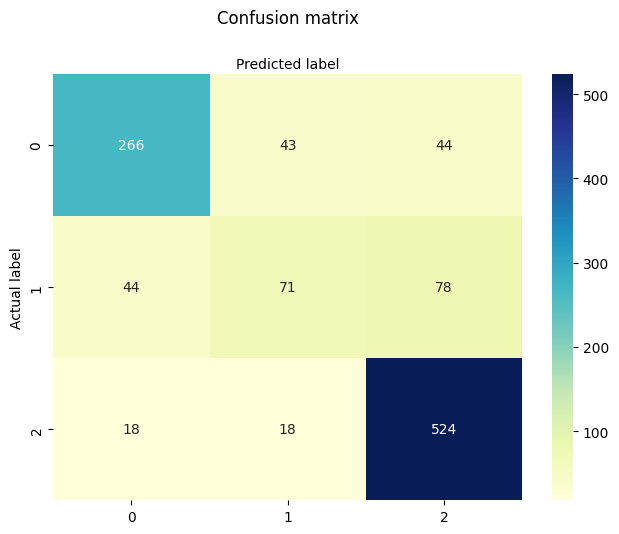

In [ ]:
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['without target', 'with target', 'other']
print(classification_report(y_test, y_pred, target_names=target_names))


                precision    recall  f1-score   support

without target       0.81      0.75      0.78       353
   with target       0.54      0.37      0.44       193
         other       0.81      0.94      0.87       560

      accuracy                           0.78      1106
     macro avg       0.72      0.69      0.70      1106
  weighted avg       0.76      0.78      0.77      1106



Implementation of SVM using sklearn

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn import linear_model
 from sklearn.model_selection import train_test_split
 from sklearn.svm import SVC
 from sklearn import metrics

In [ ]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4424 entries, 0 to 4423
Series name: Target
Non-Null Count  Dtype 
--------------  ----- 
4424 non-null   object
dtypes: object(1)
memory usage: 34.7+ KB


In [ ]:
 from sklearn.svm import SVC
 # Building a Support Vector Machine on train data
 svc_model = SVC(C= .1, kernel='linear', gamma= 1)
 svc_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [ ]:
ypred = svc_model.predict(X_test)

In [ ]:
 i = 0
 print ("\n-------------------------------------------------------------------------")
 print ('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
 print ("-------------------------------------------------------------------------")
 for label in y_test:
   print ('%-25s %-25s' % (label, ypred[i]), end="")
   if (label == ypred[i]):
     print (' %-25s' % ('Correct'))
   else:
     print (' %-25s' % ('Wrong'))
   i = i + 1
 print ("-------------------------------------------------------------------")


-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
Graduate                  Graduate                  Correct                  
Dropout                   Dropout                   Correct                  
Graduate                  Graduate                  Correct                  
Graduate                  Graduate                  Correct                  
Enrolled                  Dropout                   Wrong                    
Graduate                  Graduate                  Correct                  
Graduate                  Graduate                  Correct                  
Graduate                  Graduate                  Correct                  
Dropout                   Dropout                   Correct                  
Graduate                  Graduate                  Correct            

In [ ]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

     Dropout       0.81      0.75      0.78       353
    Enrolled       0.54      0.37      0.44       193
    Graduate       0.81      0.94      0.87       560

    accuracy                           0.78      1106
   macro avg       0.72      0.69      0.70      1106
weighted avg       0.76      0.78      0.77      1106

---------------------------------------------------------------------


In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 0.78
-------------------------------------------------------------------


In [ ]:
 from sklearn.svm import SVC
 # Building a Support Vector Machine on train data
 svc_model = SVC(kernel='rbf')
 svc_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svc_model .predict(X_test)

In [ ]:
 i = 0
 print ("\n-------------------------------------------------------------------------")
 print ('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
 print ("-------------------------------------------------------------------------")
 for label in y_test:
   print ('%-25s %-25s' % (label, y_pred[i]), end="")
   if (label == ypred[i]):
     print (' %-25s' % ('Correct'))
   else:
    print (' %-25s' % ('Wrong'))
 i = i + 1
 print ("-------------------------------------------------------------------")


-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
Graduate                  Graduate                  Correct                  
Dropout                   Graduate                  Wrong                    
Graduate                  Graduate                  Correct                  
Graduate                  Graduate                  Correct                  
Enrolled                  Graduate                  Wrong                    
Graduate                  Graduate                  Correct                  
Graduate                  Graduate                  Correct                  
Graduate                  Graduate                  Correct                  
Dropout                   Graduate                  Wrong                    
Graduate                  Graduate                  Correct            

In [ ]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

     Dropout       0.84      0.71      0.77       353
    Enrolled       0.54      0.36      0.43       193
    Graduate       0.79      0.96      0.86       560

    accuracy                           0.77      1106
   macro avg       0.72      0.68      0.69      1106
weighted avg       0.76      0.77      0.76      1106

---------------------------------------------------------------------


In [ ]:
 from sklearn.svm import SVC
 # Building a Support Vector Machine on train data
 svc_model = SVC(kernel='poly')
 svc_model.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
y_pred = svc_model .predict(X_test)

In [ ]:
 i = 0
 print ("\n-------------------------------------------------------------------------")
 print ('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
 print ("-------------------------------------------------------------------------")
 for label in y_test:
   print ('%-25s %-25s' % (label, y_pred[i]), end="")
   if (label == ypred[i]):
     print (' %-25s' % ('Correct'))
   else:
     print (' %-25s' % ('Wrong'))
 i = i + 1
 print ("-------------------------------------------------------------------")


-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
Graduate                  Graduate                  Correct                  
Dropout                   Graduate                  Wrong                    
Graduate                  Graduate                  Correct                  
Graduate                  Graduate                  Correct                  
Enrolled                  Graduate                  Wrong                    
Graduate                  Graduate                  Correct                  
Graduate                  Graduate                  Correct                  
Graduate                  Graduate                  Correct                  
Dropout                   Graduate                  Wrong                    
Graduate                  Graduate                  Correct            

In [ ]:
 print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
 print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

     Dropout       0.83      0.67      0.74       353
    Enrolled       0.48      0.13      0.20       193
    Graduate       0.69      0.95      0.80       560

    accuracy                           0.72      1106
   macro avg       0.67      0.58      0.58      1106
weighted avg       0.70      0.72      0.68      1106

---------------------------------------------------------------------


In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 0.72
-------------------------------------------------------------------


IMPLEMENTATION OF KNN CLASSIFIER


In [ ]:
 from sklearn.neighbors import KNeighborsClassifier
 knn = KNeighborsClassifier(n_neighbors=5)
 classifier = knn.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
confusion = metrics.confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion

array([[237,  52,  64],
       [ 54,  53,  86],
       [ 29,  40, 491]])

In [ ]:
 i = 0
 print ("\n-------------------------------------------------------------------------")
 print ('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
 print ("-------------------------------------------------------------------------")
 for label in y_test:
   print ('%-25s %-25s' % (label, y_pred[i]), end="")
   if (label == ypred[i]):
     print (' %-25s' % ('Correct'))
   else:
     print (' %-25s' % ('Wrong'))
 i = i + 1
 print ("-------------------------------------------------------------------")



-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
Graduate                  Graduate                  Correct                  
Dropout                   Graduate                  Wrong                    
Graduate                  Graduate                  Correct                  
Graduate                  Graduate                  Correct                  
Enrolled                  Graduate                  Wrong                    
Graduate                  Graduate                  Correct                  
Graduate                  Graduate                  Correct                  
Graduate                  Graduate                  Correct                  
Dropout                   Graduate                  Wrong                    
Graduate                  Graduate                  Correct            

In [ ]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

     Dropout       0.74      0.67      0.70       353
    Enrolled       0.37      0.27      0.31       193
    Graduate       0.77      0.88      0.82       560

    accuracy                           0.71      1106
   macro avg       0.62      0.61      0.61      1106
weighted avg       0.69      0.71      0.69      1106

---------------------------------------------------------------------


In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 0.71
-------------------------------------------------------------------
